# Introduction

Kernel Density Estimation (KDE) is a non-parametric density estimation technique. In this lab, we will learn how to use KDE to generate new samples of data. We will use the scikit-learn library to implement this technique.

# Load Data

First, we load the digits dataset from scikit-learn. This dataset contains 8x8 images of digits from 0 to 9. We will use Principal Component Analysis (PCA) to reduce the dimension of the dataset to 15.

In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# load the digits datasets
digits = load_digits()

# reduce the dimension of the dataset to 15 using PCA
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

# Optimize Bandwidth

We use grid search cross-validation to optimize the bandwidth parameter of the KDE. The bandwidth parameter controls the smoothness of the density estimate.

In [2]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import numpy as np

# use grid search cross-validation to optimize the bandwidth
params = {"bandwidth": np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_

best bandwidth: 3.79269019073225


# Generate New Samples

We use the best estimator to sample 44 new points from the data. We then transform the new data back to its original 64 dimension using the inverse of PCA.

In [3]:
# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# Plot Results

We plot the original digits and the resampled digits side by side in a 4x11 grid.

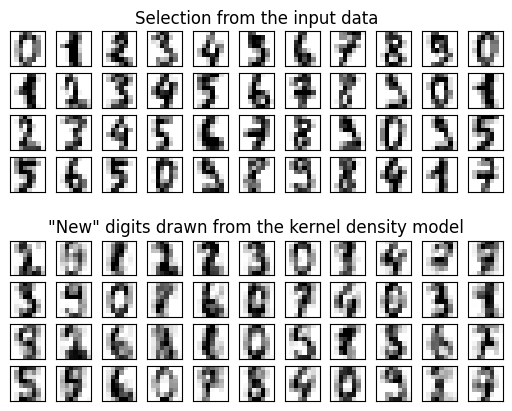

In [4]:
import matplotlib.pyplot as plt

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(
            real_data[i, j].reshape((8, 8)), cmap=plt.cm.binary, interpolation="nearest"
        )
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(
            new_data[i, j].reshape((8, 8)), cmap=plt.cm.binary, interpolation="nearest"
        )
        im.set_clim(0, 16)

ax[0, 5].set_title("Selection from the input data")
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

# Summary

In this lab, we learned how to use Kernel Density Estimation (KDE) to generate new samples of data. We used the scikit-learn library to implement this technique. We optimized the bandwidth parameter of the KDE using grid search cross-validation. We then sampled new data points and transformed them back to their original dimension using PCA. Finally, we plotted the original digits and the resampled digits side by side in a 4x11 grid.